In [6]:
import os
from keras import layers
from keras import models
from keras import optimizers


# fill this part
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50V2

conv_base = ResNet50V2(weights='imagenet',
                  include_top=False, 
                  input_shape=(200, 200, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(4, activation='softmax'))

conv_base.trainable = False
model.summary()

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.4,
      zoom_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(lr=0.0001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=80,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=40)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 74,947,588
Trainable params: 51,382,788
Non-trainable params: 23,564,800
_________________________________________________________________
Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
80/80

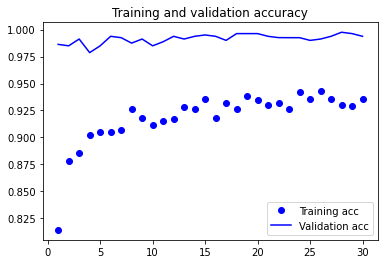

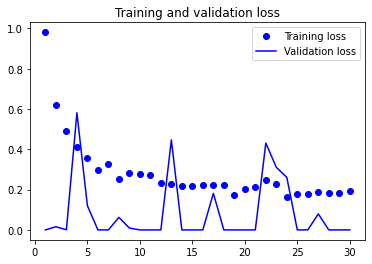

Found 200 images belonging to 4 classes.
test accuracy: 98.00%


In [9]:
#model.save('modelQ5.try1') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

import numpy as np
test_dir= os.path.join(base_dir, 'test') # very important: do not change this!



datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(200, 200), 
        batch_size=32, 
        class_mode='categorical')

loss , acc = model.evaluate_generator(generator=test_generator)
print("test accuracy: {:5.2f}%".format(100*acc))

In [11]:

from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers
from keras import models
from keras import optimizers
import numpy as np

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!
test_dir= os.path.join(base_dir, 'test') # very important: do not change this!


#reconstructed_model = models.load_model("modelQ5.try1")
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(200, 200), 
        batch_size=10, 
        class_mode='categorical', shuffle=False)

#loss , acc = model.evaluate_generator(generator=test_generator, verbose=1)
#test_generator.reset()
pred = model.predict_generator(generator=test_generator, verbose=1)


predicted_class_indices = np.argmax(pred, axis=1)
#print("predicted_class_indices ", predicted_class_indices)
labels = (test_generator.class_indices)
#print(labels)
label = dict((v,k) for k,v in labels.items())
predictions = [label[i] for i in predicted_class_indices]

filenames = test_generator.filenames

label_to_class_name = {
    'c0' : 'cat',
    'c1' : 'dog',
    'c2' : 'car',
    'c3' : 'motorbike'
}
count = 0
for idx in range(len(filenames )):
    y_hat = predictions[idx]
    y = filenames[idx].split('/')[0]
    if y_hat != y:
        print('predict  ' , label_to_class_name[y_hat])
        print('true value ', label_to_class_name[y])    
        print('filename    ' , filenames[idx])
        count += 1
print('failed ', count)
#test_sets = test_generator.next()
#for test in test_sets:
#    output = conv_base.predict(test)
    #print(output.shape)
    #result = model.predict(output)
    #print(result[0])

Found 200 images belonging to 4 classes.
20/20 [==============================] - 2s 122ms/step
predict   cat
true value  dog
filename     c1/dog_0528.jpg
predict   cat
true value  dog
filename     c1/dog_0542.jpg
predict   cat
true value  dog
filename     c1/dog_0561.jpg
predict   car
true value  dog
filename     c1/dog_0564.jpg
failed  4
